### Import the libraries required to download and extract the dataset

In [1]:
import os
import tarfile
import urllib.request
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

### Define a function to download and extract the data

In [2]:
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
	os.makedirs(housing_path, exist_ok=True)
	tgz_path = os.path.join(housing_path, "housing.tgz")
	urllib.request.urlretrieve(housing_url, tgz_path)
	housing_tgz = tarfile.open(tgz_path)
	housing_tgz.extractall(path=housing_path)
	housing_tgz.close()

Now when you call ```fetch_housing_data()```, it creates a ```datasets/housing``` directory in your workspace, downloads the **housing.tgz** file, and extracts the **housing.csv** file from it in this directory.

In [3]:
fetch_housing_data()

Now let’s load the data using pandas. Once again, you should write a small function to load the data:

In [4]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
  csv_path = os.path.join(housing_path, "housing.csv")
  return pd.read_csv(csv_path)

This function returns a pandas **DataFrame object** containing all the data.

Let’s take a look at the top five rows using the DataFrame’s ```head()``` method.

In [5]:
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Each row represents one district. There are 10 attributes: longitude, latitude, housing_median_age, total_rooms, total_bed rooms, population, households, median_income, median_house_value, and ocean_proximity.

The ```info()``` method is useful to get a quick description of the data, in particular the total number of rows, each attribute’s type, and the number of nonnull values.

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


There are 20,640 instances in the dataset, which means that it is fairly small by Machine Learning standards, but it’s perfect to get started. Notice that the total_bed rooms attribute has only 20,433 nonnull values, meaning that 207 districts are missing this feature. We will need to take care of this later.


All attributes are **numerical**, except the ocean_proximity field. Its type is **object**, so it could hold any kind of Python object. But since you loaded this data from a CSV file, you know that it must be a **text attribute**. When you looked at the top five rows, you probably noticed that the values in the ocean_proximity column were repetitive, which means that it is probably a categorical attribute. You can find out what cate‐gories exist and how many districts belong to each category by using the ```value_counts()``` method.

In [7]:
 housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Let’s look at the other fields. The describe() method shows a summary of the
numerical attributes

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


The count, mean, min, and max rows are self-explanatory. Note that the null values are ignored (so, for example, the count of total_bedrooms is 20,433, not 20,640). The std row shows the standard deviation, which measures how dispersed the values are.12. The 25%, 50%, and 75% rows show the corresponding percentiles: a percentile indicates the value below which a given percentage of observations in a group of observations fall. For example, 25% of the districts have a housing_median_age lower than 18, while 50% are lower than 29 and 75% are lower than 37. These are often called the 25th percentile (or first quartile), the median, and the 75th percentile (or third quartile).

Another quick way to get a feel of the type of data you are dealing with is to plot a histogram for each numerical attribute. A histogram shows the number of instances (on the vertical axis) that have a given value range (on the horizontal axis). You can either plot this one attribute at a time, or you can call the hist() method on the whole dataset (as shown in the following code example), and it will plot a histogram for each numerical attribute.

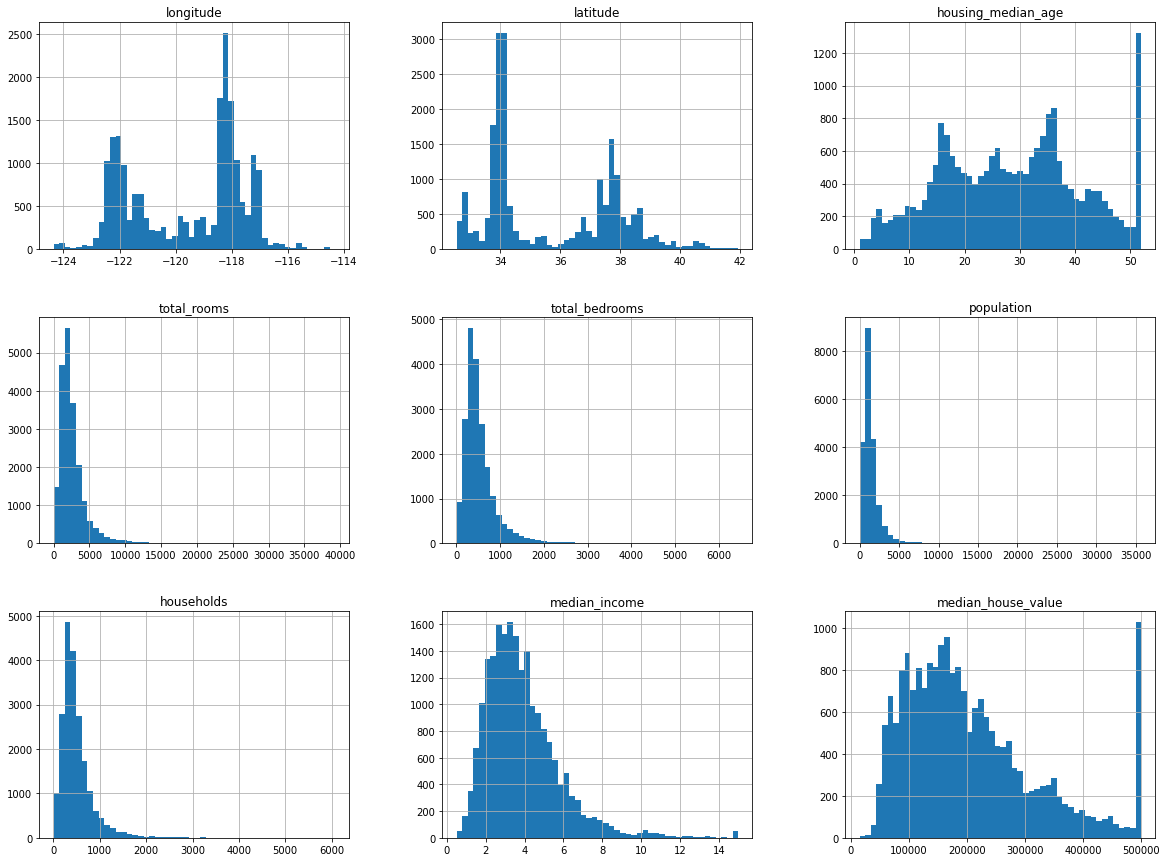

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20,15))
plt.show()

The ```hist()``` method relies on Matplotlib, which in turn relies on a
user-specified graphical backend to draw on your screen. So before
you can plot anything, you need to specify which backend Matplot‐
lib should use. The simplest option is to use Jupyter’s magic com‐
mand %matplotlib inline. This tells Jupyter to set up Matplotlib
so it uses Jupyter’s own backend. Plots are then rendered within the
notebook itself. Note that calling ```show()``` is optional in a Jupyter
notebook, as Jupyter will automatically display plots when a cell is
executed.

There are a few things you might notice in these histograms:

- First, the median income attribute does not look like it is expressed in US dollars (USD). After checking with the team that collected the data, you are told that the data has been scaled and capped at 15 (actually, 15.0001) for higher median incomes, and at 0.5 (actually, 0.4999) for lower median incomes. The numbers represent roughly tens of thousands of dollars (e.g., 3 actually means about $30,000). Working with preprocessed attributes is common in Machine Learning,and it is not necessarily a problem, but you should try to understand how the data was computed.

- The housing median age and the median house value were also capped. The later may be a serious problem since it is your target attribute (your labels). Your Machine Learning algorithms may learn that prices never go beyond that limit.
You need to check with your client team (the team that will use your system’s output) to see if this is a problem or not. If they tell you that they need precise predictions even beyond $500,000, then you have two options:

  - Collect proper labels for the districts whose labels were capped.
  - Remove those districts from the training set (and also from the test set since your system should not be evaluated poorly if it predicts values beyond
$500,000).

- These attributes have very different scales. We will discuss this later in this chapter, when we explore feature scaling.

- Finally, many histograms are tail-heavy: they extend much farther to the right of the median than to the left. This may make it a bit harder for some Machin Learning algorithms to detect patterns. We will try transforming these attributes later on to have more bell-shaped distributions.





### Creating Dataset

It may sound strange to voluntarily set aside part of the data at this stage. After all,
you have only taken a quick glance at the data, and surely you should learn a whole
lot more about it before you decide what algorithms to use, right? This is true, but
your brain is an amazing pattern detection system, which means that it is highly
prone to overfitting: if you look at the test set, you may stumble upon some seemingly
interesting pattern in the test data that leads you to select a particular kind of
Machine Learning model. When you estimate the generalization error using the test
set, your estimate will be too optimistic, and you will launch a system that will not
perform as well as expected. This is called data snooping bias.
Creating a test set is theoretically simple: pick some instances randomly, typically
20% of the dataset (or less if your dataset is very large), and set them aside:

In [10]:
import numpy as np
def split_train_test(data, test_ratio):
  shuffled_indices = np.random.permutation(len(data))
  test_set_size = int(len(data) * test_ratio)
  test_indices = shuffled_indices[:test_set_size]
  train_indices = shuffled_indices[test_set_size:]
  return data.iloc[train_indices], data.iloc[test_indices]

In [11]:
 train_set, test_set = split_train_test(housing, 0.2)

In [12]:
 len(train_set)

16512

In [13]:
 len(test_set)

4128

Well, this works, but it is not perfect: if you run the program again, it will generate a
different test set! Over time, you (or your Machine Learning algorithms) will get to
see the whole dataset, which is what you want to avoid.


One solution is to save the test set on the first run and then load it in subsequent
runs. Another option is to set the random number generator’s seed (e.g., with np.ran
dom.seed(42))
14 before calling np.random.permutation() so that it always generates
the same shuffled indices.

But both these solutions will break the next time you fetch an updated dataset. To
have a stable train/test split even after updating the dataset, a common solution is to
use each instance’s identifier to decide whether or not it should go in the test set
(assuming instances have a unique and immutable identifier). For example, you could
compute a hash of each instance’s identifier and put that instance in the test set if the
hash is lower than or equal to 20% of the maximum hash value. This ensures that the
test set will remain consistent across multiple runs, even if you refresh the dataset.
The new test set will contain 20% of the new instances, but it will not contain any
instance that was previously in the training set.

In [14]:
from zlib import crc32
def test_set_check(identifier, test_ratio):
 return crc32(np.int64(identifier)) & 0xffffffff < test_ratio * 2**32

In [15]:
def split_train_test_by_id(data, test_ratio, id_column):
 ids = data[id_column]
 in_test_set = ids.apply(lambda id_: test_set_check(id_, test_ratio))
 return data.loc[~in_test_set], data.loc[in_test_set]

In [16]:
housing_with_id = housing.reset_index() # adds an `index` column
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "index")

If you use the row index as a unique identifier, you need to make sure that new data
gets appended to the end of the dataset and that no row ever gets deleted. If this is not
possible, then you can try to use the most stable features to build a unique identifier.
For example, a district’s latitude and longitude are guaranteed to be stable for a few
million years, so you could combine them into an ID like so:

In [17]:
housing_with_id["id"] = housing["longitude"] * 1000 + housing["latitude"]
train_set, test_set = split_train_test_by_id(housing_with_id, 0.2, "id")

Scikit-Learn provides a few functions to split datasets into multiple subsets in various
ways. The simplest function is train_test_split(), which does pretty much the
same thing as the function split_train_test(), with a couple of additional features.
First, there is a random_state parameter that allows you to set the random generator
seed. Second, you can pass it multiple datasets with an identical number of rows, and
it will split them on the same indices (this is very useful, for example, if you have a
separate DataFrame for labels)

In [18]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)


So far we have considered purely random sampling methods. This is generally fine if
your dataset is large enough (especially relative to the number of attributes), but if it
is not, you run the risk of introducing a significant sampling bias. When a survey
company decides to call 1,000 people to ask them a few questions, they don’t just pick
1,000 people randomly in a phone book. They try to ensure that these 1,000 people
are representative of the whole population. For example, the US population is 51.3%
females and 48.7% males, so a well-conducted survey in the US would try to maintain
this ratio in the sample: 513 female and 487 male. This is called stratified sampling:
the population is divided into homogeneous subgroups called strata, and the right
number of instances are sampled from each stratum to guarantee that the test set is
representative of the overall population

 The following code uses the
pd.cut() function to create an income category attribute with five categories (labeled
from 1 to 5): category 1 ranges from 0 to 1.5 (i.e., less than $15,000), category 2 from
1.5 to 3, and so on

In [19]:
housing["income_cat"] = pd.cut(housing["median_income"],bins=[0., 1.5, 3.0, 4.5, 6., np.inf],labels=[1, 2, 3, 4, 5])

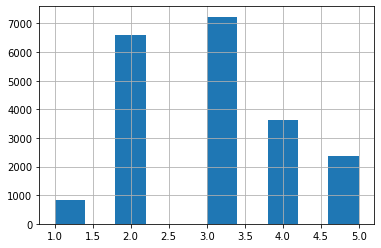

In [20]:
housing["income_cat"].hist()

In [21]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
 strat_train_set = housing.loc[train_index]
 strat_test_set = housing.loc[test_index]

In [22]:
 strat_test_set["income_cat"].value_counts() / len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

With similar code you can measure the income category proportions in the full dataset

In [23]:
for set_ in (strat_train_set, strat_test_set):
 set_.drop("income_cat", axis=1, inplace=True)

### Exploring the data and Visualization

So far you have only taken a quick glance at the data to get a general understanding of
the kind of data you are manipulating. Now the goal is to go into a little more depth.
First, make sure you have put the test set aside and you are only exploring the train‐
ing set. Also, if the training set is very large, you may want to sample an exploration
set, to make manipulations easy and fast. In our case, the set is quite small, so you can
just work directly on the full set. Let’s create a copy so that you can play with it
without harming the training set

In [24]:
housing = strat_train_set.copy()

### Visualizing Geographical Data
Since there is geographical information (latitude and longitude), it is a good idea to
create a scatterplot of all districts to visualize the data

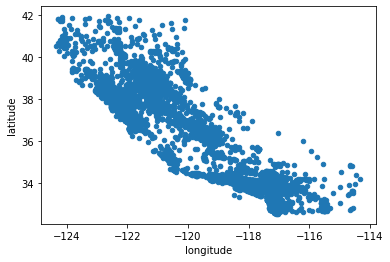

In [25]:
housing.plot(kind="scatter", x="longitude", y="latitude")

This looks like California all right, but other than that it is hard to see any particular
pattern. Setting the alpha option to 0.1 makes it much easier to visualize the places
where there is a high density of data points :

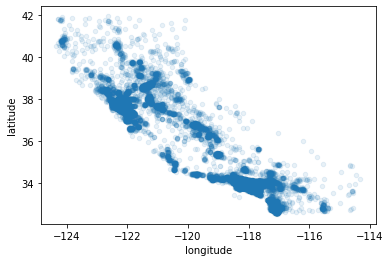

In [26]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.1)


Now let’s look at the housing prices. The radius of each circle represents
the district’s population (option s), and the color represents the price (option c). We
will use a predefined color map (option cmap) called jet, which ranges from blue
(low values) to red (high prices)

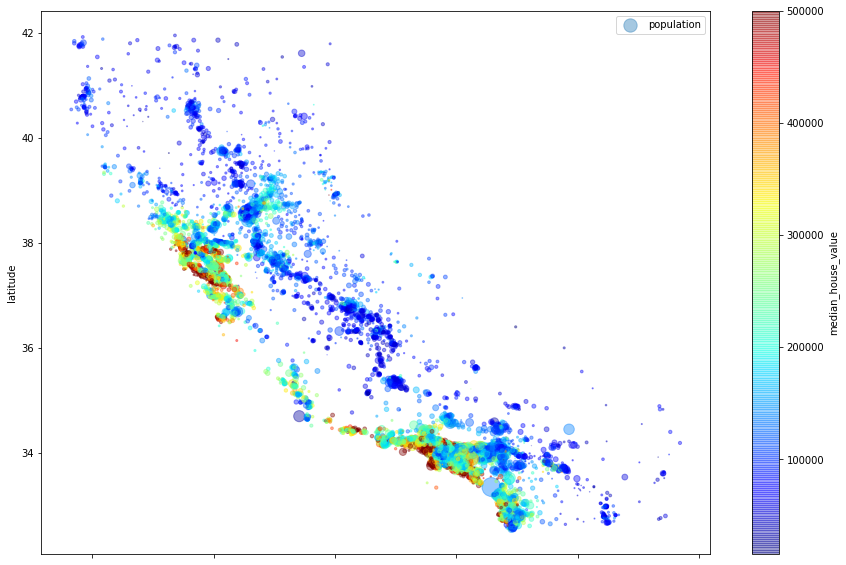

In [27]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
 s=housing["population"]/100, label="population", figsize=(15,10),
 c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

 California housing prices: red is expensive, blue is cheap, larger circles indi‐
cate areas with a larger population

Since the dataset is not too large, you can easily compute the standard correlation
coefficient (also called Pearson’s r) between every pair of attributes using the corr()
method

In [28]:
corr_matrix = housing.corr()

In [29]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

The correlation coefficient ranges from –1 to 1. When it is close to 1, it means that
there is a strong positive correlation; for example, the median house value tends to go
up when the median income goes up. When the coefficient is close to –1, it means
that there is a strong negative correlation; you can see a small negative correlation
between the latitude and the median house value (i.e., prices have a slight tendency to
go down when you go north). Finally, coefficients close to 0 mean that there is no
linear correlation


Another way to check for correlation between attributes is to use the pandas
scatter_matrix() function, which plots every numerical attribute against every other numerical attribute. Since there are now 11 numerical attributes, you would get
112 = 121 plots, which would not fit on a page—so let’s just focus on a few promising
attributes that seem most correlated with the median housing value.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa7db366518>,
      dtype=object)

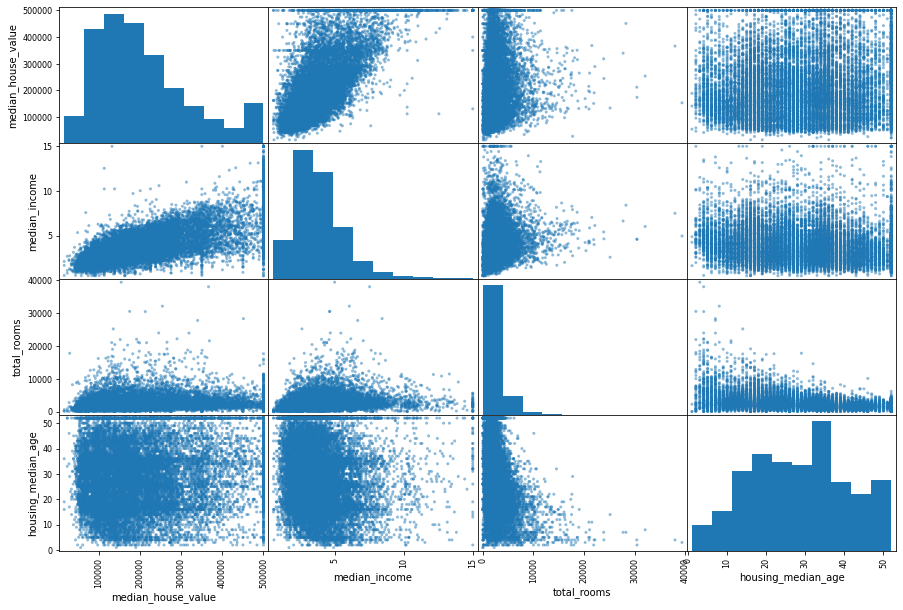

In [30]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms","housing_median_age"]
scatter_matrix(housing[attributes], figsize=(15, 10))

The main diagonal (top left to bottom right) would be full of straight lines if pandas
plotted each variable against itself, which would not be very useful. So instead pandas
displays a histogram of each attribute (other options are available; see the pandas
documentation for more details).


The most promising attribute to predict the median house value is the median
income, so let’s zoom in on their correlation scatterplot.

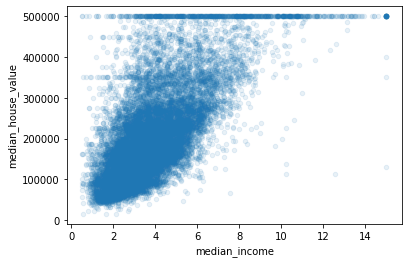

In [31]:
housing.plot(kind="scatter", x="median_income", y="median_house_value",alpha=0.1)


This plot reveals a few things. First, the correlation is indeed very strong; you can
clearly see the upward trend, and the points are not too dispersed. Second, the price
cap that we noticed earlier is clearly visible as a horizontal line at $500000.

 But this plot reveals other less obvious straight lines: a horizontal line around \$450,000. Another around \$350,000, perhaps one around $280,000, and a few more below that.
You may want to try removing the corresponding districts to prevent your algorithms
from learning to reproduce these data quirks.

Hopefully the previous sections gave you an idea of a few ways you can explore the
data and gain insights. You identified a few data quirks that you may want to clean up
before feeding the data to a Machine Learning algorithm, and you found interesting
correlations between attributes, in particular with the target attribute. You also
noticed that some attributes have a tail-heavy distribution, so you may want to trans‐
form them (e.g., by computing their logarithm). Of course, your mileage will vary
considerably with each project, but the general ideas are similar.


One last thing you may want to do before preparing the data for Machine Learning
algorithms is to try out various attribute combinations. For example, the total num‐
ber of rooms in a district is not very useful if you don’t know how many households
there are. What you really want is the number of rooms per household. Similarly, the
total number of bedrooms by itself is not very useful: you probably want to compare
it to the number of rooms. And the population per household also seems like an
interesting attribute combination to look at. Let’s create these new attributes:

In [32]:
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"]=housing["population"]/housing["households"]

In [33]:
corr_matrix = housing.corr()

In [34]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_room          -0.259984
Name: median_house_value, dtype: float64

Hey, not bad! The new bedrooms_per_room attribute is much more correlated with
the median house value than the total number of rooms or bedrooms. Apparently
houses with a lower bedroom/room ratio tend to be more expensive. The number of
rooms per household is also more informative than the total number of rooms in a
district—obviously the larger the houses, the more expensive they are.


This round of exploration does not have to be absolutely thorough; the point is to
start off on the right foot and quickly gain insights that will help you get a first reasonably good prototype. But this is an iterative process: once you get a prototype up
and running, you can analyze its output to gain more insights and come back to this
exploration step.

### Prepare the Data for Machine Learning Algorithms

In [35]:
housing = strat_train_set.drop("median_house_value", axis=1) #features
housing_labels = strat_train_set["median_house_value"].copy() #target

### Data Cleaning

Most Machine Learning algorithms cannot work with missing features, so let’s create
a few functions to take care of them. We saw earlier that the total_bedrooms
attribute has some missing values, so let’s fix this. You have three options:
1. Get rid of the corresponding districts.
2. Get rid of the whole attribute.
3. Set the values to some value (zero, the mean, the median, etc.).

You can accomplish these easily using DataFrame’s dropna(), drop(), and fillna()
methods:

In [36]:
housing.dropna(subset=["total_bedrooms"]) # option 1
housing.drop("total_bedrooms", axis=1) # option 2
median = housing["total_bedrooms"].median() # option 3
housing["total_bedrooms"].fillna(median, inplace=True)

If you choose option 3, you should compute the median value on the training set and
use it to fill the missing values in the training set. Don’t forget to save the median
value that you have computed. You will need it later to replace missing values in the
test set when you want to evaluate your system, and also once the system goes live to
replace missing values in new data.


Scikit-Learn provides a handy class to take care of missing values: SimpleImputer.
Here is how to use it. First, you need to create a SimpleImputer instance, specifying
that you want to replace each attribute’s missing values with the median of that
attribute

In [37]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

Since the median can only be computed on numerical attributes, you need to create a
copy of the data without the text attribute ocean_proximity:

In [38]:
housing_num = housing.drop("ocean_proximity", axis=1)

In [39]:
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

The imputer has simply computed the median of each attribute and stored the result
in its statistics_instance variable. Only the total_bedrooms attribute had missing
values, but we cannot be sure that there won’t be any missing values in new data after
the system goes live, so it is safer to apply the imputer to all the numerical attributes:


In [40]:
 imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [41]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Now you can use this “trained” imputer to transform the training set by replacing
missing values with the learned medians

In [42]:
X = imputer.transform(housing_num)

The result is a plain NumPy array containing the transformed features. If you want to
put it back into a pandas DataFrame, it’s simple:

In [43]:
housing_tr = pd.DataFrame(X, columns=housing_num.columns, index=housing_num.index)

In [44]:
housing_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347
...,...,...,...,...,...,...,...,...
6563,-118.13,34.20,46.0,1271.0,236.0,573.0,210.0,4.9312
12053,-117.56,33.88,40.0,1196.0,294.0,1052.0,258.0,2.0682
13908,-116.40,34.09,9.0,4855.0,872.0,2098.0,765.0,3.2723
11159,-118.01,33.82,31.0,1960.0,380.0,1356.0,356.0,4.0625


### Handling Text and Categorical Attributes


In [45]:
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN
19480,INLAND
8879,<1H OCEAN
13685,INLAND
4937,<1H OCEAN
4861,<1H OCEAN


Convert the categories from text to numbers.

In [46]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

You can get the list of categories using the categories_ instance variable. It is a list
containing a 1D array of categories for each categorical attribute (in this case, a list
containing a single array since there is just one categorical attribute):

In [47]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

One issue with this representation is that ML algorithms will assume that two nearby
values are more similar than two distant values. This may be fine in some cases (e.g.,
for ordered categories such as “bad,” “average,” “good,” and “excellent”), but it is obvi‐
ously not the case for the ocean_proximity column (for example, categories 0 and 4
are clearly more similar than categories 0 and 1). To fix this issue, a common solution is to create one binary attribute per category: one attribute equal to 1 when the cate‐
gory is “ < 1H OCEAN” (and 0 otherwise), another attribute equal to 1 when the cate‐
gory is “INLAND” (and 0 otherwise), and so on. This is called one-hot encoding,
because only one attribute will be equal to 1 (hot), while the others will be 0 (cold).
The new attributes are sometimes called dummy attributes. Scikit-Learn provides a
OneHotEncoder class to convert categorical values into one-hot vectors:

In [48]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Notice that the output is a SciPy sparse matrix, instead of a NumPy array. This is very
useful when you have categorical attributes with thousands of categories. After one-hot encoding, we get a matrix with thousands of columns, and the matrix is full of 0s
except for a single 1 per row. Using up tons of memory mostly to store zeros would
be very wasteful, so instead a sparse matrix only stores the location of the nonzero
elements. You can use it mostly like a normal 2D array, but if you really want to convert it to a (dense) NumPy array, just call the toarray() method:

In [49]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [50]:
 cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

If a categorical attribute has a large number of possible categories
(e.g., country code, profession, species), then one-hot encoding will
result in a large number of input features. This may slow down
training and degrade performance. If this happens, you may want
to replace the categorical input with useful numerical features
related to the categories: for example, you could replace the
ocean_proximity feature with the distance to the ocean (similarly,
a country code could be replaced with the country’s population and
GDP per capita). Alternatively, you could replace each category
with a learnable, low-dimensional vector called an embedding. Each
category’s representation would be learned during training. This is
an example of representation learning (see Chapters 13 and 17 for
more details)

### Custom Transformers

Although Scikit-Learn provides many useful transformers, you will need to write
your own for tasks such as custom cleanup operations or combining specific
attributes. You will want your transformer to work seamlessly with Scikit-Learn functionalities (such as pipelines), and since Scikit-Learn relies on duck typing (not inheritance), all you need to do is create a class and implement three methods: fit()
(returning self), transform(), and fit_transform().

You can get the last one for free by simply adding TransformerMixin as a base class.
If you add BaseEstimator as a base class (and avoid *args and **kargs in your con‐
structor), you will also get two extra methods (get_params() and set_params()) that
will be useful for automatic hyperparameter tuning

In [51]:
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
  def __init__(self, add_bedrooms_per_room = True): # no *args or **kargs
    self.add_bedrooms_per_room = add_bedrooms_per_room
  def fit(self, X, y=None):
    return self # nothing else to do
  def transform(self, X):
    rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
    population_per_household = X[:, population_ix] / X[:, households_ix]
    if self.add_bedrooms_per_room:
      bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
      return np.c_[X, rooms_per_household, population_per_household,bedrooms_per_room]
    else:
      return np.c_[X, rooms_per_household, population_per_household]
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In this example the transformer has one hyperparameter, add_bedrooms_per_room,
set to True by default (it is often helpful to provide sensible defaults). This hyperparameter will allow you to easily find out whether adding this attribute helps the
Machine Learning algorithms or not. More generally, you can add a hyperparameter
to gate any data preparation step that you are not 100% sure about. The more you
automate these data preparation steps, the more combinations you can automatically
try out, making it much more likely that you will find a great combination (and saving you a lot of time).

### Feature Scaling

One of the most important transformations you need to apply to your data is feature
scaling. With few exceptions, Machine Learning algorithms don’t perform well when
the input numerical attributes have very different scales. This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median
incomes only range from 0 to 15. Note that scaling the target values is generally not
required.


There are two common ways to get all attributes to have the same scale: **min-max scaling and standardization**.


Min-max scaling (many people call this normalization) is the simplest: values are shifted and rescaled so that they end up ranging from 0 to 1. We do this by subtracting
the min value and dividing by the max minus the min. Scikit-Learn provides a transformer called **MinMaxScaler** for this. It has a feature_range hyperparameter that lets
you change the range if, for some reason, you don’t want 0–1.


Standardization is different: first it subtracts the mean value (so standardized values
always have a zero mean), and then it divides by the standard deviation so that the
resulting distribution has unit variance. Unlike min-max scaling, standardization
does not bound values to a specific range, which may be a problem for some algo‐
rithms (e.g., neural networks often expect an input value ranging from 0 to 1). However, standardization is much less affected by outliers. For example, suppose a district
had a median income equal to 100 (by mistake). Min-max scaling would then crush
all the other values from 0–15 down to 0–0.15, whereas standardization would not be
much affected. Scikit-Learn provides a transformer called **StandardScaler** for
standardization.


### Transformation Pipelines

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
 ('imputer', SimpleImputer(strategy="median")),
 ('attribs_adder', CombinedAttributesAdder()),
 ('std_scaler', StandardScaler()),
 ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

The Pipeline constructor takes a list of name/estimator pairs defining a sequence of
steps. All but the last estimator must be transformers (i.e., they must have a
fit_transform() method). The names can be anything you like (as long as they are
unique and don’t contain double underscores, __); they will come in handy later for
hyperparameter tuning.


When you call the pipeline’s fit() method, it calls fit_transform() sequentially on
all transformers, passing the output of each call as the parameter to the next call until
it reaches the final estimator, for which it calls the fit() method.


The pipeline exposes the same methods as the final estimator. In this example, the last
estimator is a StandardScaler, which is a transformer, so the pipeline has a trans
form() method that applies all the transforms to the data in sequence (and of course
also a fit_transform() method, which is the one we used).


So far, we have handled the categorical columns and the numerical columns sepa‐
rately. It would be more convenient to have a single transformer able to handle all col‐
umns, applying the appropriate transformations to each column. In version 0.20,
Scikit-Learn introduced the ColumnTransformer for this purpose, and the good news
is that it works great with pandas DataFrames. Let’s use it to apply all the transformations to the housing data:

In [53]:
from sklearn.compose import ColumnTransformer
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]
full_pipeline = ColumnTransformer([
 ("num", num_pipeline, num_attribs),
 ("cat", OneHotEncoder(), cat_attribs),
 ])
housing_prepared = full_pipeline.fit_transform(housing)

First we import the ColumnTransformer class, next we get the list of numerical col‐
umn names and the list of categorical column names, and then we construct a Colum
nTransformer. The constructor requires a list of tuples, where each tuple contains a
name, a transformer, and a list of names (or indices) of columns that the transformer should be applied to. In this example, we specify that the numerical columns
should be transformed using the num_pipeline that we defined earlier, and the categorical columns should be transformed using a OneHotEncoder. Finally, we apply this
ColumnTransformer to the housing data: it applies each transformer to the appropriate columns and concatenates the outputs along the second axis (the transformers
must return the same number of rows).


Note that the OneHotEncoder returns a sparse matrix, while the num_pipeline returns
a dense matrix. When there is such a mix of sparse and dense matrices, the Colum
nTransformer estimates the density of the final matrix (i.e., the ratio of nonzero
cells), and it returns a sparse matrix if the density is lower than a given threshold (by
default, sparse_threshold=0.3). In this example, it returns a dense matrix. And
that’s it! We have a preprocessing pipeline that takes the full housing data and applies
the appropriate transformations to each column.

### Select and Train a Model

#### Training and Evaluating on the Training Set

In [54]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Done! You now have a working Linear Regression model. Let’s try it out on a few
instances from the training set:

In [55]:
 some_data = housing.iloc[:5]

In [56]:
 some_labels = housing_labels.iloc[:5]

In [57]:
 some_data_prepared = full_pipeline.transform(some_data)


In [58]:
print("Predictions:", lin_reg.predict(some_data_prepared))


Predictions: [210644.60459286 317768.80697211 210956.43331178  59218.98886849
 189747.55849879]


In [59]:
 print("Labels:", list(some_labels))

Labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


It works, although the predictions are not exactly accurate (e.g., the first prediction is
off by close to 40%!). Let’s measure this regression model’s RMSE on the whole train‐
ing set using Scikit-Learn’s mean_squared_error() function:

In [60]:
from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68628.19819848923

This is better than nothing, but clearly not a great score: most districts’ median_hous
ing_values range between $120,000 and $265,000, so a typical prediction error of
$68,628 is not very satisfying. This is an example of a model underfitting the training
data. When this happens it can mean that the features do not provide enough information to make good predictions, or that the model is not powerful enough. As
we saw in the previous chapter, the main ways to fix underfitting are to select a more
powerful model, to feed the training algorithm with better features, or to reduce the
constraints on the model. This model is not regularized, which rules out the last
option. You could try to add more features (e.g., the log of the population), but first
let’s try a more complex model to see how it does.


Let’s train a DecisionTreeRegressor.

In [61]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

Now that the model is trained, let’s evaluate it on the training set:

In [62]:
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course,
it is much more likely that the model has badly overfit the data. How can you be sure?
As we saw earlier, you don’t want to touch the test set until you are ready to launch a
model you are confident about, so you need to use part of the training set for training
and part of it for model validation.

### Better Evaluation Using Cross-Validation

One way to evaluate the Decision Tree model would be to use the
**train_test_split()** function to split the training set into a smaller training set and a
validation set, then train your models against the smaller training set and evaluate
them against the validation set. It’s a bit of work, but nothing too difficult, and it
would work fairly well.


A great alternative is to use Scikit-Learn’s K-fold cross-validation feature. The following code randomly splits the training set into 10 distinct subsets called folds, then it
trains and evaluates the Decision Tree model 10 times, picking a different fold for
evaluation every time and training on the other 9 folds. The result is an array containing the 10 evaluation scores:

In [63]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)


In [64]:
def display_scores(scores):
  print("Scores:", scores)
  print("Mean:", scores.mean())
  print("Standard deviation:", scores.std())

In [65]:
 display_scores(tree_rmse_scores)

Scores: [69839.74815907 67446.28521117 70787.29156625 68888.69033889
 71551.09381475 75411.86348158 70202.9055003  70401.77987534
 78605.90358274 70248.53097385]
Mean: 71338.40925039315
Standard deviation: 3106.5846846507766


Now the Decision Tree doesn’t look as good as it did earlier. In fact, it seems to per‐
form worse than the Linear Regression model! Notice that cross-validation allows
you to get not only an estimate of the performance of your model, but also a measure
of how precise this estimate is (i.e., its standard deviation). The Decision Tree has a
score of approximately 71,407, generally ±2,439. You would not have this information
if you just used one validation set. But cross-validation comes at the cost of training
the model several times, so it is not always possible.


Let’s compute the same scores for the Linear Regression model just to be sure:


In [66]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

Scores: [66782.73843989 66960.118071   70347.95244419 74739.57052552
 68031.13388938 71193.84183426 64969.63056405 68281.61137997
 71552.91566558 67665.10082067]
Mean: 69052.46136345083
Standard deviation: 2731.674001798344


That’s right: the Decision Tree model is overfitting so badly that it performs worse
than the Linear Regression model.

Let’s try one last model now: the RandomForestRegressor. As we will see in Chap‐
ter 7, Random Forests work by training many Decision Trees on random subsets of
the features, then averaging out their predictions. Building a model on top of many
other models is called Ensemble Learning, and it is often a great way to push ML algo‐
rithms even further. We will skip most of the code since it is essentially the same as
for the other models:

In [67]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

You should save every model you experiment with so that you can
come back easily to any model you want. Make sure you save both
the hyperparameters and the trained parameters, as well as the
cross-validation scores and perhaps the actual predictions as well.
This will allow you to easily compare scores across model types,
and compare the types of errors they make. You can easily save
Scikit-Learn models by using Python’s pickle module or by using
the joblib library, which is more efficient at serializing large
NumPy arrays (you can install this library using pip):


### Fine-Tune Your Model

Let’s assume that you now have a shortlist of promising models. You now need to
fine-tune them. Let’s look at a few ways you can do that.

#### Grid Search

One option would be to fiddle with the hyperparameters manually, until you find a
great combination of hyperparameter values. This would be very tedious work, and
you may not have time to explore many combinations.

Instead, you should get Scikit-Learn’s GridSearchCV to search for you. All you need
to do is tell it which hyperparameters you want it to experiment with and what values
to try out, and it will use cross-validation to evaluate all the possible combinations of
hyperparameter values. For example, the following code searches for the best combi‐
nation of hyperparameter values for the RandomForestRegressor:

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
 scoring='neg_mean_squared_error',
return_train_score=True)
grid_search.fit(housing_prepared, housing_labels)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [70]:
 grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [71]:
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

And of course the evaluation scores are also available:


In [72]:
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64133.84056011609 {'max_features': 2, 'n_estimators': 3}
55401.98887036385 {'max_features': 2, 'n_estimators': 10}
52667.49842220029 {'max_features': 2, 'n_estimators': 30}
60968.146589569486 {'max_features': 4, 'n_estimators': 3}
52903.6894013222 {'max_features': 4, 'n_estimators': 10}
50264.21341858618 {'max_features': 4, 'n_estimators': 30}
59420.90644631845 {'max_features': 6, 'n_estimators': 3}
52691.84467799997 {'max_features': 6, 'n_estimators': 10}
49872.14633916418 {'max_features': 6, 'n_estimators': 30}
58889.334123481545 {'max_features': 8, 'n_estimators': 3}
52490.340127124786 {'max_features': 8, 'n_estimators': 10}
50179.744540385276 {'max_features': 8, 'n_estimators': 30}
62191.69347968931 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54379.30397705299 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
60451.238171652534 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52276.281004872406 {'bootstrap': False, 'max_features': 3, 'n_estimators

In [73]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.070442,0.002602,0.004142,0.000089,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.986087e+09,-4.247272e+09,-4.233026e+09,-3.926795e+09,-4.172567e+09,-4.113150e+09,1.317288e+08,18,-1.064348e+09,-1.151174e+09,-1.058552e+09,-1.102345e+09,-1.085644e+09,-1.092413e+09,3.326123e+07
1,0.227626,0.007673,0.012313,0.000263,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.029536e+09,-3.151358e+09,-3.159530e+09,-2.891972e+09,-3.114507e+09,-3.069380e+09,9.994488e+07,11,-6.091289e+08,-5.439529e+08,-5.772575e+08,-5.874792e+08,-5.694094e+08,-5.774456e+08,2.140504e+07
2,0.679986,0.009243,0.035688,0.000360,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.540157e+09,-2.906892e+09,-2.875643e+09,-2.615842e+09,-2.930793e+09,-2.773865e+09,1.626480e+08,7,-4.211982e+08,-4.201629e+08,-4.233027e+08,-4.375935e+08,-4.265020e+08,-4.257518e+08,6.304891e+06
3,0.111638,0.002455,0.004292,0.000124,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.619577e+09,-4.021325e+09,-3.741137e+09,-3.539046e+09,-3.664490e+09,-3.717115e+09,1.655973e+08,16,-9.960323e+08,-9.854901e+08,-9.807775e+08,-9.750203e+08,-9.715769e+08,-9.817794e+08,8.575513e+06
4,0.364120,0.005423,0.012311,0.000263,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.594230e+09,-3.019921e+09,-2.965228e+09,-2.567674e+09,-2.846948e+09,-2.798800e+09,1.866437e+08,9,-5.119898e+08,-5.524513e+08,-5.017237e+08,-5.200571e+08,-5.172784e+08,-5.207000e+08,1.706595e+07
5,1.092222,0.008568,0.034757,0.000348,4,30,NaN,"{'max_features': 4, 'n_estimators': 30}",-2.326917e+09,-2.573261e+09,-2.699502e+09,-2.391140e+09,-2.641637e+09,-2.526491e+09,1.438947e+08,3,-3.867590e+08,-3.861367e+08,-3.808983e+08,-3.874697e+08,-3.970370e+08,-3.876601e+08,5.230977e+06
6,0.155309,0.002124,0.004559,0.000460,6,3,NaN,"{'max_features': 6, 'n_estimators': 3}",-3.434578e+09,-3.432793e+09,-3.598670e+09,-3.512953e+09,-3.675227e+09,-3.530844e+09,9.449658e+07,14,-9.494791e+08,-8.698374e+08,-9.325858e+08,-9.987661e+08,-9.625030e+08,-9.426343e+08,4.240934e+07
7,0.509234,0.004950,0.012412,0.000202,6,10,NaN,"{'max_features': 6, 'n_estimators': 10}",-2.656346e+09,-2.847014e+09,-2.902758e+09,-2.654500e+09,-2.821534e+09,-2.776430e+09,1.022374e+08,8,-4.940931e+08,-5.177434e+08,-5.035911e+08,-5.308065e+08,-5.053578e+08,-5.103184e+08,1.271235e+07
8,1.502541,0.015522,0.034897,0.000411,6,30,NaN,"{'max_features': 6, 'n_estimators': 30}",-2.299924e+09,-2.607577e+09,-2.654064e+09,-2.277643e+09,-2.596947e+09,-2.487231e+09,1.633188e+08,1,-3.790750e+08,-3.926692e+08,-3.847179e+08,-3.812162e+08,-3.881505e+08,-3.851658e+08,4.860186e+06
9,0.192404,0.003827,0.004694,0.000240,8,3,NaN,"{'max_features': 8, 'n_estimators': 3}",-3.210500e+09,-3.655440e+09,-3.555204e+09,-3.322942e+09,-3.595681e+09,-3.467954e+09,1.711076e+08,12,-8.928364e+08,-9.503926e+08,-8.893281e+08,-9.498151e+08,-9.356633e+08,-9.236071e+08,2.709819e+07


The grid search approach is fine when you are exploring relatively few combinations,
like in the previous example, but when the hyperparameter search space is large, it is
often preferable to use RandomizedSearchCV instead. This class can be used in much
the same way as the GridSearchCV class, but instead of trying out all possible combinations, it evaluates a given number of random combinations by selecting a random
value for each hyperparameter at every iteration. This approach has two main
benefits:
  - If you let the randomized search run for, say, 1,000 iterations, this approach will
explore 1,000 different values for each hyperparameter (instead of just a few values per hyperparameter with the grid search approach).
  - Simply by setting the number of iterations, you have more control over the computing budget you want to allocate to hyperparameter search

In [74]:
 feature_importances = grid_search.best_estimator_.feature_importances_

In [75]:
feature_importances

array([7.97899352e-02, 7.07743910e-02, 4.34335573e-02, 1.58046274e-02,
       1.69558287e-02, 1.73339288e-02, 1.60850150e-02, 3.13293079e-01,
       6.94097060e-02, 1.05262580e-01, 7.95851103e-02, 1.31398733e-02,
       1.50244423e-01, 8.51629897e-05, 3.03779640e-03, 5.76498512e-03])

Let’s display these importance scores next to their corresponding attribute names:


In [76]:
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.31329307911365767, 'median_income'),
 (0.1502444232863098, 'INLAND'),
 (0.1052625800497411, 'pop_per_hhold'),
 (0.07978993520816831, 'longitude'),
 (0.07958511033018614, 'bedrooms_per_room'),
 (0.0707743910034914, 'latitude'),
 (0.06940970596049381, 'rooms_per_hhold'),
 (0.043433557308870774, 'housing_median_age'),
 (0.017333928820582233, 'population'),
 (0.016955828719541873, 'total_bedrooms'),
 (0.016085015026423878, 'households'),
 (0.015804627374723625, 'total_rooms'),
 (0.013139873289823826, '<1H OCEAN'),
 (0.005764985118428182, 'NEAR OCEAN'),
 (0.0030377963998191545, 'NEAR BAY'),
 (8.516298973823386e-05, 'ISLAND')]

### Evaluate Your System on the Test Set

In [77]:
final_model = grid_search.best_estimator_

In [78]:
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

In [79]:
X_test_prepared = full_pipeline.transform(X_test)

In [80]:
final_predictions = final_model.predict(X_test_prepared)

In [81]:
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse) 

In [82]:
final_rmse

47556.95951741506

In some cases, such a point estimate of the generalization error will not be quite
enough to convince you to launch: what if it is just 0.1% better than the model currently in production? You might want to have an idea of how precise this estimate is.
For this, you can compute a 95% confidence interval for the generalization error using
**scipy.stats.t.interval()**

In [83]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1, loc=squared_errors.mean(), scale=stats.sem(squared_errors)))

array([45562.50051528, 49471.07583101])

If you did a lot of hyperparameter tuning, the performance will usually be slightly
worse than what you measured using cross-validation (because your system ends up
fine-tuned to perform well on the validation data and will likely not perform as well
on unknown datasets). It is not the case in this example, but when this happens you
must resist the temptation to tweak the hyperparameters to make the numbers look
good on the test set; the improvements would be unlikely to generalize to new data.

### Saving the model

Perfect, you got approval to launch! You now need to get your solution ready for production (e.g., polish the code, write documentation and tests, and so on). Then you
can deploy your model to your production environment. One way to do this is to save
the trained Scikit-Learn model (e.g., **using joblib**), including the full preprocessing
and prediction pipeline, then load this trained model within your production environment and use it to make predictions by calling its predict() method. For example, perhaps the model will be used within a website: the user will type in some data about a new district and click the Estimate Price button. This will send a query con‐
taining the data to the web server, which will forward it to your web application, and
finally your code will simply call the model’s predict() method (you want to load the
model upon server startup, rather than every time the model is used). Alternatively,
you can wrap the model within a dedicated web service that your web application can
query through a REST API23 (see Figure 2-17). This makes it easier to upgrade your
model to new versions without interrupting the main application. It also simplifies
scaling, since you can start as many web services as needed and load-balance the
requests coming from your web application across these web services. Moreover, it
allows your web application to use any language, not just Python.

Another popular strategy is to deploy your model on the cloud, for example on **Google Cloud AI Platform** (formerly known as Google Cloud ML Engine): just save your
model using joblib and upload it to Google Cloud Storage (GCS), then head over to
Google Cloud AI Platform and create a new model version, pointing it to the GCS
file. That’s it! This gives you a simple web service that takes care of load balancing and
scaling for you. It take JSON requests containing the input data (e.g., of a district) and
returns JSON responses containing the predictions. You can then use this web service
in your website (or whatever production environment you are using). As we will see
in Chapter 19, deploying TensorFlow models on AI Platform is not much different
from deploying Scikit-Learn models.